# Dis11: KMeans and PCA with MNIST data with 2 and 6 digits

## MNIST data with 2 and 6 digits

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, cache=True)

In [2]:
mask2 = [i for i, j in enumerate(mnist.target) if j == '2']
mask6 = [i for i, j in enumerate(mnist.target) if j == '6']

mask = mask2 + mask6

# data [784 x 13866]
data = mnist.data.values[mask].T

# label [13866,]
label = mnist.target.values[mask].astype(int)
label

array([2, 2, 2, ..., 6, 6, 6])

## PCA for the MNIST data

In [3]:
# pca
d, n = data.shape
mean = np.mean(data, axis=1)
mean = mean[:,np.newaxis]

In [4]:
# xc is the covariance matrix with data in columns
xc = data - mean
C = xc @ xc.T / n

# same as the eigen decomposition 
# u is the eigenvectors matrix
# s is the eigenvalues 

u, s, _ = np.linalg.svd(C)

# number of principal components
npc = 2

ut = u[:, 0:npc]
ds = np.diag(s[0:npc])
d_inv_half = np.diag(s[0:npc]**(-1/2))

# pca matrix multiplication

# npc x n [2 x 13866]
data_rd = (xc.T @ ut @ d_inv_half).T  

# check the data_rd.shape after PCA
data_rd.shape

# projected data points are columns of data_rd

(2, 13866)

## Kmeans for the MNIST after PCA 

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state = 0).fit(data_rd.T)
predictions = kmeans.predict(data_rd.T)

# change the labels to match the predictions
label[label == 2] = 0
label[label == 6] = 1

# calculate the size to find the true positive rate
size2 = np.sum(label == 0)
real2 = label[0:size2]
real6 = label[size2:]

# true positive rate for each digit
tpr2 = np.sum(predictions[0:size2] == 0) / real2.shape[0]
tpr6 = np.sum(predictions[size2:] == 1) / real6.shape[0]

print('true positive rate for 2:', tpr2)
print('true positive rate for 6:', tpr6)

true positive rate for 2: 0.9224606580829757
true positive rate for 6: 0.9232111692844677


In [6]:
# kmeans++
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(data_rd.T)
predictions = kmeans.predict(data_rd.T)

# reverse the labels to match the predictions in k-means++
label[label == 2] = 1
label[label == 6] = 0

size2 = np.sum(label == 1)
real2 = label[0:size2]
real6 = label[size2:]

# true positive rate for each digit
tpr2 = np.sum(predictions[0:size2] == 1) / real2.shape[0]
tpr6 = np.sum(predictions[size2:] == 0) / real6.shape[0]

print('true positive rate for 2 (kmeans++):', tpr2)
print('true positive rate for 6 (kmeans++):', tpr6)

true positive rate for 2 (kmeans++): 0.9219022687609075
true positive rate for 6 (kmeans++): 0.9091559370529327


## PCA plot for MNIST data 
### In this section, we will use the PCA package from sklearn

### The PCA plot for MNIST data before K-means

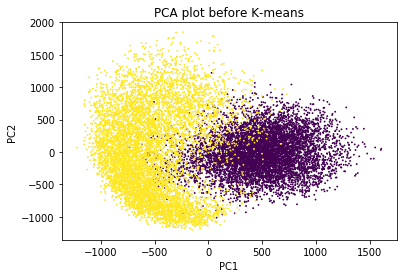

In [7]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2).fit(data.T)
data2D = pca.transform(data.T)

# plot the PCA for MNIST 2 and 6 before K-means

plt.scatter(data2D[:, 0], data2D[:, 1], c = label, alpha = 1, s = 0.7)
plt.title("PCA plot before K-means")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### The PCA plot for MNIST data after K-means

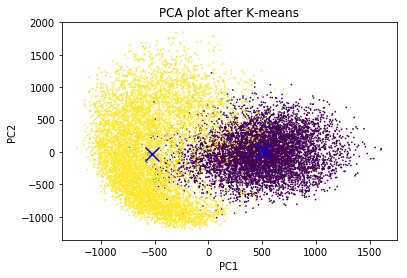

In [8]:
# Kmeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(data2D)

# The plot shows the result after the k-means clustering

plt.scatter(data2D[:, 0], data2D[:, 1],
            c=label, edgecolor='', s = 3)

# plot the centroids after the PCA for data

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3,
            color="Blue", zorder=10)

plt.title("PCA plot after K-means")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()